Evaluating the amount of usable tweets for a typical lower league match in the Netherlands.  
We will use the fixture NAC - FC Den Bosch from Sunday February 13 2022 as the main example

<i>Imports</i>

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

<i>General functions</i>

In [5]:
def add_usernames(sns_df):
    """Extracts usernames from the SnScrape 'user' column, and adds them to the dataframe"""
    sns_df['username'] = [row.user['username'] for _, row in sns_df.iterrows()]
    return sns_df

<i>Loading the data</i>

In [10]:
# get all historical tweets with #nacdbo
nacdbo = pd.read_json('nacdbo.json', lines=True)
# extract the usernames
nacdbo = add_usernames(nacdbo)
# filter on date, to focus on the fixture of February 2022
nacdbo = nacdbo[nacdbo.date > '2022-02-01']

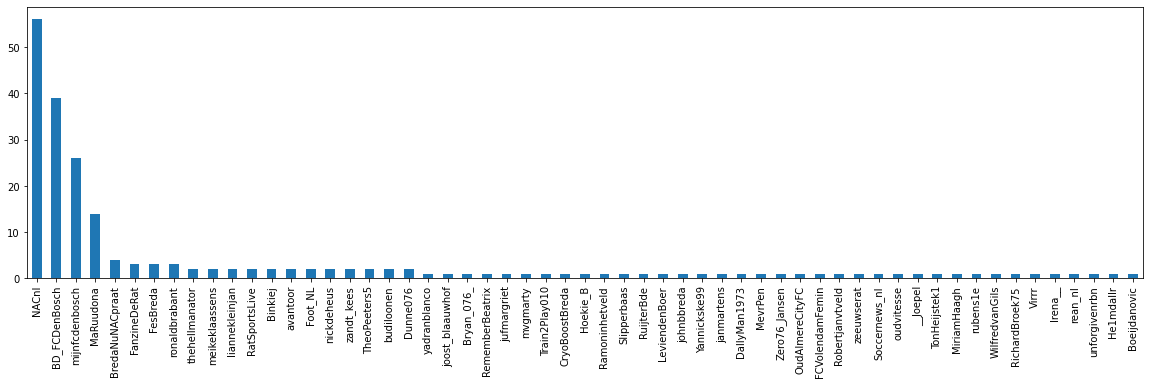

In [23]:
fig = plt.figure(figsize=(20,5))
nacdbo.username.value_counts().plot(kind='bar')
plt.show()

There are a few accounts that are clearly not representing individual fans, such as:
- NACnl - the football club's account)
- BD_FCDenBosch - BD stands for Brabants Dagblad, a local newspaper
- BredaNuNACpraat - Breda Nu is the local broadcaster for the hometown of NAC
There are two more accounts that stand out that are less obvious: 'mijnfcdenbosch' en 'MaRuudona', let's see what kind of content they post

In [25]:
nacdbo.renderedContent[nacdbo.username == 'mijnfcdenbosch']

15     𝙒𝙚𝙙𝙨𝙩𝙧𝙞𝙟𝙙𝙫𝙚𝙧𝙨𝙡𝙖𝙜\n\nFC Den Bosch onderuit in B...
28     90. Het is klaar in Breda. FC Den Bosch verdie...
36     90. Dan lijkt de beslissing van de wedstrijd t...
41     86. PFFFFFF\n\nEen goede voorzet van Jeremy Ci...
44     84. Laatste wissel voor NAC.\n⬅️Agougil\n➡️Azz...
49     80. Jack de Gier wisselt tweemaal!\n⬅️Leijten\...
53     72. Nog een personeelswissel bij NAC.\n⬅️ De R...
62     63. Kaj de Rooij schiet richting het doel, maa...
68     56. WOUTER!\n\nHilterman komt 1-op-1 met onze ...
76     47. WAT EEN KANS VOOR BAKELTJE\n\nSebastiaan v...
80     46. We zijn weer begonnen in Breda, met 1 wijz...
88     45. Rust⏱️\n\nWe gaan aan de thee in Breda. Na...
97     27. DOUGLAS!\n\nDe linksachter zet op de linke...
101    31. 🟨Gele kaart voor Jeredy Hilterman. \n\n#NA...
105    27. 🟨Gele kaart voor Dino Halilovic, die Ralf ...
113    14. Weer een poging van de Bosschenaren. Dit m...
115    13. FC Den Bosch wordt steeds gevaarlijker. Ee...
119    11. Na een rommelige ope

In [26]:
nacdbo.renderedContent[nacdbo.username == 'MaRuudona']

165    Een elftal speler met een Den Bosch- en NAC-ve...
166    Henk zou twee seizoenen later voor NAC gaan sp...
177    En de voorloper van Den Bosch, BVV dus, had oo...
179    Cor Kools produceerde ooit een dubbele hattric...
180    NAC - BVV werd 33 keer gespeeld. 18 keer een z...
181    Tegen de voorloper van FC Den Bosch, zij ginge...
182    Andere Bredase treffers:\nJohn Lammers, Ad Bak...
183    Spelers die namen NAC twee keer scoorden: Scha...
184    Toto Cornelissen is de enige speler die drie k...
185    In 1971, het was de eerste keer dat ze elkaar ...
186    NAC won dus 7 van de vorige NAC - Den Bosch-ed...
187    Slechts 5 Bossche treffers in de 11 duels. \nD...
188    Drie keer eindigde de confrontatie in een geli...
189    Morgen wordt voor de 12e keer een NAC - Den Bo...
Name: renderedContent, dtype: object

'mijnfcdenbosch' seems to give an overview of the key events of the match annotated with the minute in which they happen. 'MaRuudona' provides historical facts about the two clubs. Both cannot really be considered to have something to say about the performance of the players.

In [30]:
ignore = ['NACnl', 'BD_FCDenBosch', 'mijnfcdenbosch', 'MaRuudona', 'BredaNuNACpraat']
nacdbo_filtered = nacdbo[~nacdbo.username.isin(ignore)].reset_index()

In [32]:
nacdbo_filtered.shape

(70, 30)

This leaves us with 70 tweets for one of the smallest matches in Dutch football, this is a good sign!